In [1]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

# Aplicación de Algoritmos (Data Cruda)

In [0]:
from sklearn.model_selection import train_test_split

#Partición de la data cruda
X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix
def eval_model(model, X_val, y_val):
  #Realizando la prediccion del modelo
  y_pred = model.predict(X_val)
  #Calculando el error cuadratico medio
  MSE =mean_squared_error(y_val, y_pred)
  #Generando la matriz de confusion
  conf = confusion_matrix(y_val, y_pred)
  #Calculando las metricas
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred)
  recall = recall_score(y_val, y_pred)
  f1score = f1_score(y_val, y_pred)
  
  #Print de las metricas
  print('El MSE para el modelo '+type(model).__name__ +' es: ',MSE)
  print('El accuracy para el modelo '+type(model).__name__ +' es: ',accuracy)
  print('El precision para el modelo '+type(model).__name__ +' es: ',precision)
  print('El recall para el modelo '+type(model).__name__ +' es: ',recall)
  print('El F1-score para el modelo '+type(model).__name__ +' es: ',f1score)
  
  sns.heatmap(conf,annot=True, fmt="d", cmap="coolwarm");
  return None

##1° Algorithm Test: Random Forest

El MSE para el modelo RandomForestClassifier es:  0.02201774564574433
El accuracy para el modelo RandomForestClassifier es:  0.9779822543542557
El precision para el modelo RandomForestClassifier es:  0.9344262295081968
El recall para el modelo RandomForestClassifier es:  0.8172043010752689
El F1-score para el modelo RandomForestClassifier es:  0.8718929254302105


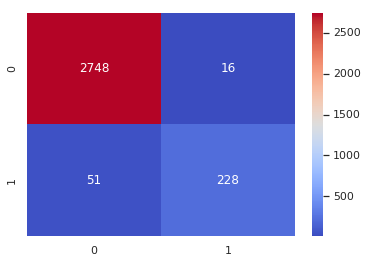

In [5]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model.fit(X_train, y_train)

eval_model(RF_model, X_val, y_val)

##2° Algorithm Test: SVM

El MSE para el modelo SVC es:  0.09069996713769307
El accuracy para el modelo SVC es:  0.909300032862307
El precision para el modelo SVC es:  1.0
El recall para el modelo SVC es:  0.010752688172043012
El F1-score para el modelo SVC es:  0.021276595744680854


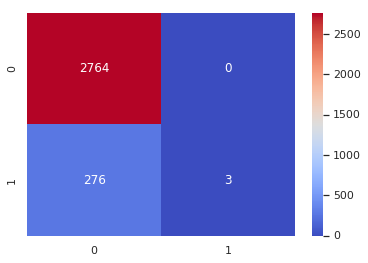

In [6]:
from sklearn.svm import SVC

SVM_model = SVC(gamma='auto',kernel='rbf')
SVM_model.fit(X_train, y_train) 

eval_model(SVM_model, X_val, y_val)

##3° Algorithm Test: KNN

El MSE para el modelo KNeighborsClassifier es:  0.026947091685836345
El accuracy para el modelo KNeighborsClassifier es:  0.9730529083141637
El precision para el modelo KNeighborsClassifier es:  0.8924302788844621
El recall para el modelo KNeighborsClassifier es:  0.8028673835125448
El F1-score para el modelo KNeighborsClassifier es:  0.8452830188679245


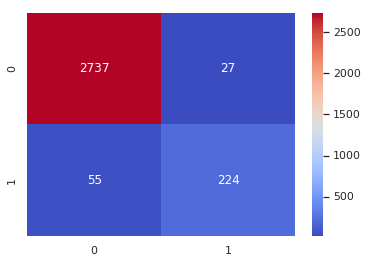

In [7]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train) 

eval_model(KNN_model, X_val, y_val)

##4° Algorithm Test: ANN - Multi-layer Perceptron

El MSE para el modelo MLPClassifier es:  0.020374630299046993
El accuracy para el modelo MLPClassifier es:  0.979625369700953
El precision para el modelo MLPClassifier es:  0.9125475285171103
El recall para el modelo MLPClassifier es:  0.8602150537634409
El F1-score para el modelo MLPClassifier es:  0.885608856088561


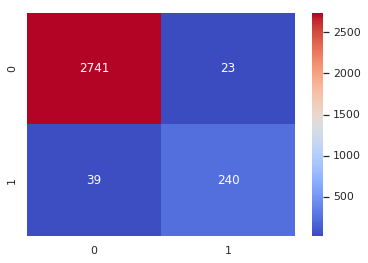

In [8]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier()
NN_model.fit(X_train, y_train) 

eval_model(NN_model, X_val, y_val)

# Preprocesamiento de la Data

## Escalamiento de la data

In [0]:
#Escalamiento 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_pulsar)
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns = head)
data_pulsar_scaled.describe()

#Partición de la data escalada
X_sca = data_pulsar_scaled.drop(columns=["is_pulsar"])
y_sca = data_pulsar_scaled["is_pulsar"]

X_trainval_sca, X_test_sca, y_trainval_sca, y_test_sca = train_test_split(X_sca, y_sca, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train_sca, X_val_sca, y_train_sca, y_val_sca = train_test_split(X_trainval_sca, y_trainval_sca, test_size=0.2, random_state=0)


## Aplicación de SMOTE-ENN

In [10]:
#Antes de aplicar SMOTE
y_train_sca.value_counts()
print(type(y_train), type(X_train))

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


In [0]:
#https://imbalanced-learn.readthedocs.io/en/stable/combine.html
from collections import Counter
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
X_train_smoteenn = pd.DataFrame(X_resampled)
y_train_smoteenn = pd.Series(y_resampled)


# Aplicación de Modelos a data con SMOTE

##1° Algorithm Test: Random Forest

El MSE para el modelo RandomForestClassifier es:  0.03187643772592836
El accuracy para el modelo RandomForestClassifier es:  0.9681235622740716
El precision para el modelo RandomForestClassifier es:  0.7935483870967742
El recall para el modelo RandomForestClassifier es:  0.8817204301075269
El F1-score para el modelo RandomForestClassifier es:  0.835314091680815


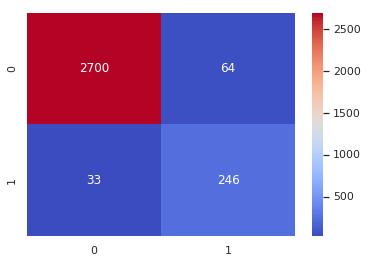

In [15]:
from sklearn.ensemble import RandomForestClassifier

RF_model2 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model2.fit(X_train_smoteenn, y_train_smoteenn)

eval_model(RF_model2, X_val, y_val)

##2° Algorithm Test: SVM

El MSE para el modelo SVC es:  0.09431482090042721
El accuracy para el modelo SVC es:  0.9056851790995728
El precision para el modelo SVC es:  0.4701492537313433
El recall para el modelo SVC es:  0.22580645161290322
El F1-score para el modelo SVC es:  0.3050847457627119


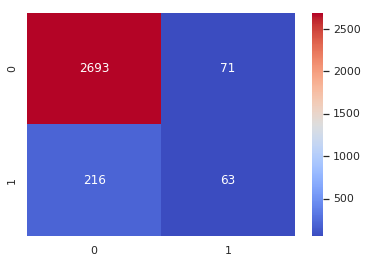

In [16]:
from sklearn.svm import SVC

SVM_model2 = SVC(gamma='auto',kernel='rbf')
SVM_model2.fit(X_train_smoteenn, y_train_smoteenn) 

eval_model(SVM_model2, X_val, y_val)

##3° Algorithm Test: KNN

El MSE para el modelo KNeighborsClassifier es:  0.08544199802826158
El accuracy para el modelo KNeighborsClassifier es:  0.9145580019717384
El precision para el modelo KNeighborsClassifier es:  0.5195071868583162
El recall para el modelo KNeighborsClassifier es:  0.9068100358422939
El F1-score para el modelo KNeighborsClassifier es:  0.660574412532637


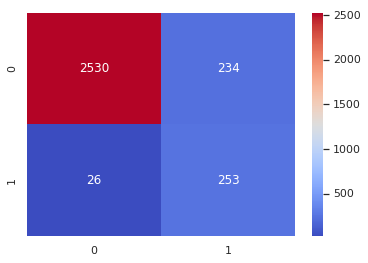

In [17]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model2 = KNeighborsClassifier(n_neighbors=5)
KNN_model2.fit(X_train_smoteenn, y_train_smoteenn) 

eval_model(KNN_model2, X_val, y_val)

##4° Algorithm Test: ANN - Multi-layer Perceptron

El MSE para el modelo MLPClassifier es:  0.032205060795267824
El accuracy para el modelo MLPClassifier es:  0.9677949392047321
El precision para el modelo MLPClassifier es:  0.7801857585139319
El recall para el modelo MLPClassifier es:  0.9032258064516129
El F1-score para el modelo MLPClassifier es:  0.8372093023255813


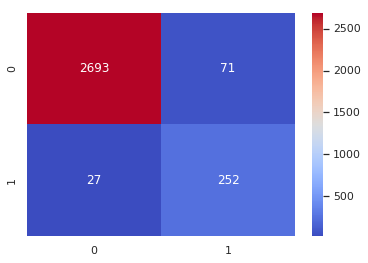

In [18]:
from sklearn.neural_network import MLPClassifier

NN_model2 = MLPClassifier()
NN_model2.fit(X_train_smoteenn, y_train_smoteenn) 

eval_model(NN_model2, X_val, y_val)